##  Regresja liniowa

Regresja liniowa to tworzenie modeli przedstawiających wielkość, której wartość chcemy przewidzieć (zmienna zależna) jako kombinację liniową predyktorów (zmiennych zależnych).

Struktura modelu ma postać

$$\tilde{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

lub w formie macierzowej 

$$\tilde{\mathbf{y}} = \mathbf{[1\  X ]} \beta$$

gdzie wektor wartości zmiennych zależnych jest przewidywany na podstawie macierzy danych i wektora współczynników $\beta$.

Współczynnik $\beta_0$ w nomentkalturze anglojęzycznej jest nazywany *intercept* ponieważ jest to punkt przecięcia się z osią $y$ gdy wszystkie predyktory są równe 0.

Aby wyznaczyć parametry modelu liniowego potrzebujemy wektora danych uczących, tj. znanych nam wartości zmiennej zależnej  $\mathbf{y}$ oraz odpowiadająxcej mu macierzy predyktorów $\mathbf{X}$. Macierz predyktorów nosi nazwę *design matrix*, i bardzo użytyeczne do jej wyznaczenia (w oparciu o dane w forme dataframe) jest pakiet [patsy](https://patsy.readthedocs.io/en/latest/quickstart.html), a w szczególności funkcja ```dmatrices```.


Model regresyjny ma mocne umocowanie statystyczne, jednak w ramach zajęć będziemy traktować go machinistycznie jak jedną z metod uczenia maszynowego. Do tworzenia takich modeli służy klasa ```LinearRegression```

Do analizy regresji liniowej wykorzystywać będziemy pakiet ```scikit-learn``` oraz zawarte w nim klasy, głównie w modułach ```linear_model```, ```metrics``` oraz ```model_selection```. 

### Dane uczące i dane testowe

Zazwyczaj rozwiązując problem nie mamy dostępu do dodatkowych danych testowych uzupełniających nasze dane uczące. Dlatego też, popularną praktyką jest podzielenie posiadanego zbioru danych w sposób losowy na dwa zbiory: uczący i testowy. Do tego służy funkcja ```train_test_split``` z modułu ```model_selection```. 



### Zadanie 1
Na podstawie danych zawartych w pliku SCORES.csv wykonaj i oceń regresję liniową, gdzie Twoją daną niezależną (predyktorem) będą godziny poświęcone na przygotowanie, a wynikową uzyskane punkty. Wykonanie zadania powinno składać się z następujących kroków:
1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytaj dane z pliku SCORES.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Wykonaj wstępny wykres uzyskanych danych (typu "scatter")
4. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (30%)
5. Utwróz model regresji liniowej za pomocą sklearn.
6. Wypisz i przeanalizuj wyliczone wskaźniki dla modelu: coef_ oraz intercept_. Czym one są i do czego służą?
7. Wykorzystając stworozny model dokonaj predykcji dla części testowej X. Porównaj wynik (y_pred) z posiadanymi danymi (y_test).
8. Wykonaj wykres konfrontujący dane testowe (X_test, y_test; typu "scatter") oraz predykcje (X_test, y_pred; linia prosta)
9. Dokonaj walidacji uzyskanych predykcji wykorzystując metryki: średni błąd bezwzględny (Mean Absolute Error), błąd średniokwadratowy (Mean Squared Error) oraz pierwiastek błędu średniokwadratowego (Root Mean Squared Error).

Następnie utworzony skrypt wykorzystaj na danych zawartych w SBP.csv, gdzie predyktorem będzie wiek, a wynikiem ciśnienie (SBP). Czy uzyskane wyniki z modelu są równie zadowalające?

In [296]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import linear_model  as lin
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import model_selection, metrics
#from patsy import dmatrices, dmatrix, demo_data


In [297]:
data = r'C:\Users\Acer\OneDrive\Pulpit\STUDIA1\sem5\AiBD\lab7\laboratorium-lin-model-maksymrzepka-main/'
df_original_ = pd.read_csv(f"{data}SCORES.csv", sep=',')
print(df_original_)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


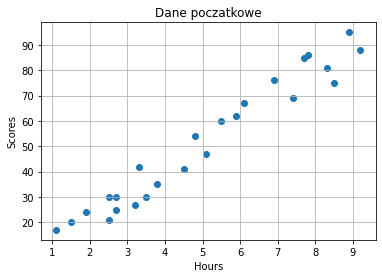

In [298]:
x = df_original_['Hours']
y = df_original_['Scores']
plt.scatter(x,y)
plt.title("Dane poczatkowe")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.grid()

Wymiary tabeli: (25, 2)


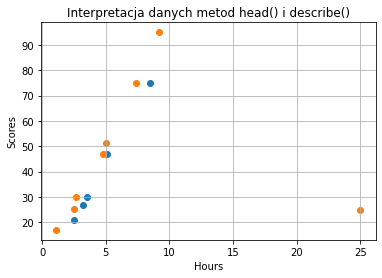

In [299]:
head = df_original_.head()
desribe = df_original_.describe()

x_1 = head['Hours']
y_1 = head['Scores']
plt.scatter(x_1,y_1)

x_2 = desribe['Hours']
y_2 = desribe['Scores']
plt.scatter(x_2,y_2)

print('Wymiary tabeli:', df_original_.shape)

plt.title("Interpretacja danych metod head() i describe()")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.grid()

In [300]:
# x = hours
# y = scores

df_scores = pd.read_csv(f'{data}SCORES.csv', sep=',')

x = df_scores['Hours'].to_numpy().reshape(-1, 1)
y = df_scores['Scores'].to_numpy().reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, train_size=0.3)


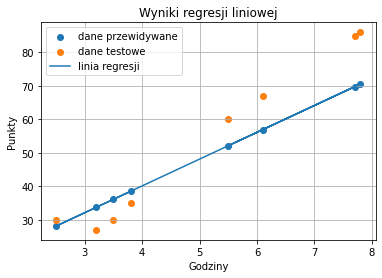

In [301]:
# LinearRegression().fit(x,y)

linia_regresji = lin.LinearRegression()
linia_regresji.fit(X_train, y_train)
y_pred = linia_regresji.predict(X_test)

meansquere_error = metrics.mean_squared_error(y_pred, y_test)
meanabsolute_error = metrics.mean_absolute_error(y_pred, y_test)

plt.scatter(X_test, y_pred, label = 'dane przewidywane')
plt.scatter(X_test,y_test,label = 'dane testowe')
plt.plot(X_test,y_pred,label = 'linia regresji')

plt.title("Wyniki regresji liniowej")
plt.xlabel("Godziny")
plt.ylabel("Punkty")
plt.legend()
plt.grid()


In [302]:
print("Średni błąd bezwzględny:", meanabsolute_error)
print("Błąd średniokwadratowy:", meansquere_error)
print("Pierwiastek błędu średniokwadratowego:", np.sqrt(meansquere_error))

coef = linia_regresji.coef_
intercept = linia_regresji.intercept_

print("Współczynnik funckji liniowej (coef_):", coef[0][0])
print("Miejce przecięcia z osią y (intercept_):", intercept[0])

Średni błąd bezwzględny: 8.362701435687073
Błąd średniokwadratowy: 91.6794339081477
Pierwiastek błędu średniokwadratowego: 9.57493780179003
Współczynnik funckji liniowej (coef_): 8.001171989452098
Miejce przecięcia z osią y (intercept_): 8.138001757984163


In [303]:
# x = SBP
# y = Age

df_SBP = pd.read_csv(f'{data}SBP.csv', sep=',')

x = df_SBP['SBP'].to_numpy().reshape(-1, 1)
y = df_SBP['Age'].to_numpy().reshape(-1, 1)

X_train, X_test, y_train, y_test = model_selection.train_test_split(x,y,test_size= 0.3,train_size=0.3)

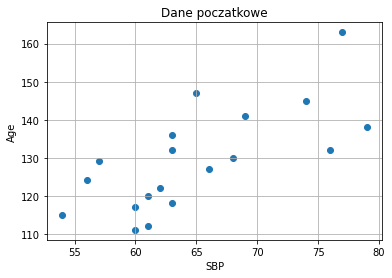

In [304]:
plt.scatter(y, x)
plt.title("Dane poczatkowe")
plt.ylabel("Age")
plt.xlabel("SBP")
plt.grid()

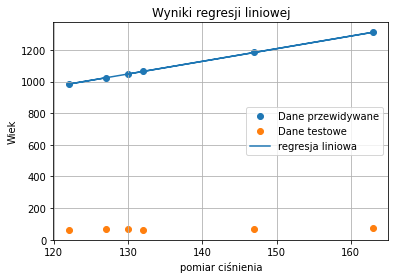

In [305]:
y_pred = linia_regresji.predict(X_test)
plt.scatter(X_test, y_pred, label = 'Dane przewidywane')
plt.scatter(X_test,y_test,label = 'Dane testowe')
plt.plot(X_test,y_pred,label = 'regresja liniowa')
plt.ylabel("Wiek")
plt.xlabel("pomiar ciśnienia")
plt.title("Wyniki regresji liniowej")
plt.legend()
plt.grid()


In [306]:
print("Średni błąd bezwzględny:", meanabsolute_error)
print("Błąd średniokwadratowy:", meansquere_error)
print("Pierwiastek błędu średniokwadratowego:", np.sqrt(meansquere_error))

coef = linia_regresji.coef_
intercept = linia_regresji.intercept_

print("Współczynnik funckji liniowej (coef_):", coef[0][0])
print("Miejce przecięcia z osią y (intercept_):", intercept[0])

Średni błąd bezwzględny: 8.362701435687073
Błąd średniokwadratowy: 91.6794339081477
Pierwiastek błędu średniokwadratowego: 9.57493780179003
Współczynnik funckji liniowej (coef_): 8.001171989452098
Miejce przecięcia z osią y (intercept_): 8.138001757984163


6. Wypisz i przeanalizuj wyliczone wskaźniki dla modelu: coef_ oraz intercept_. Czym one są i do czego służą?
- Regresja liniowa polega na utworzeniu prostej linii, ktora w jak najlepszy sposob ukazuje zaleznosci miedzy wartosciami i argumentami z dnego zbioru punktow.
- Wskazniki "coef_" oraz "intercept_" odpowiadaja za wyliczenie parametrow funkcji.

### Zadanie 2
Na podstawie danych zawartych w pliku PETROL.csv wykonaj i oceń regresję liniową. Jako daną zależną wykorzystaj zużycie paliwa, a pozostałe - jako predyktory. Wykonanie zadania powinno składać się z kroków podobnych do tych z zadania poprzedniego.

Czy uzyskane wyniki predykcji modelu są dobre? Co mogło mieć pozytywny/negatywny wpływ na taki wynik?

In [307]:
df_petrol = pd.read_csv(f'{data}PETROL.csv', sep=',')

x = df_petrol['Zuzycie_paliwa'].to_numpy().reshape(-1, 1)
y_1 = df_petrol['Podatek_paliwowy'].to_numpy().reshape(-1, 1)
y_2 = df_petrol['Sredni_przychod'].to_numpy().reshape(-1, 1)
y_3 = df_petrol['Utwardzone_autostrady'].to_numpy().reshape(-1, 1)
y_4 = df_petrol['Procent_ludnosci_z_prawem_jazdy'].to_numpy().reshape(-1, 1)

X_train, X_test, y_train, y_test = model_selection.train_test_split(x,y_1,test_size= 0.3,train_size=0.3)
X_train, X_test, y_train, y_test = model_selection.train_test_split(x,y_2,test_size= 0.3,train_size=0.3)
X_train, X_test, y_train, y_test = model_selection.train_test_split(x,y_3,test_size= 0.3,train_size=0.3)
X_train, X_test, y_train, y_test = model_selection.train_test_split(x,y_4,test_size= 0.3,train_size=0.3)



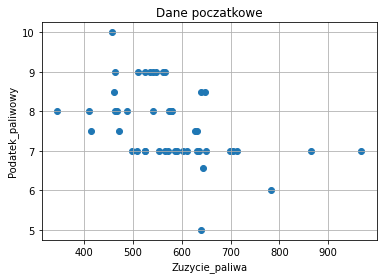

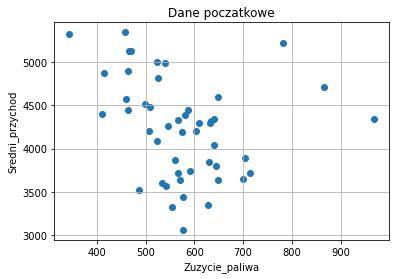

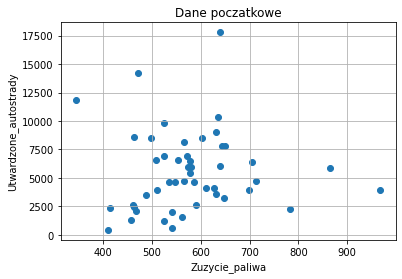

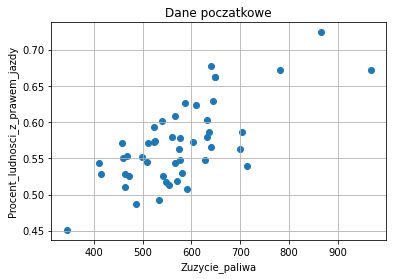

In [308]:
plt.scatter(x,y_1)
plt.xlabel("Zuzycie_paliwa")
plt.ylabel("Podatek_paliwowy")
plt.title("Dane poczatkowe")
plt.grid()
plt.show()

plt.scatter(x,y_2)
plt.xlabel("Zuzycie_paliwa")
plt.ylabel("Sredni_przychod")
plt.title("Dane poczatkowe")
plt.grid()
plt.show()

plt.scatter(x,y_3)
plt.xlabel("Zuzycie_paliwa")
plt.ylabel("Utwardzone_autostrady")
plt.title("Dane poczatkowe")
plt.grid()
plt.show()

plt.scatter(x,y_4)
plt.xlabel("Zuzycie_paliwa")
plt.ylabel("Procent_ludnosci_z_prawem_jazdy")
plt.title("Dane poczatkowe")
plt.grid()
plt.show()

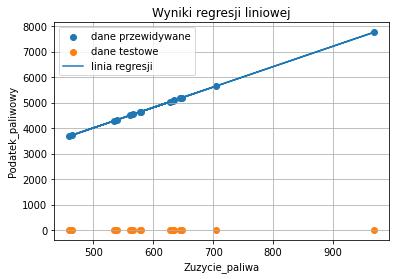

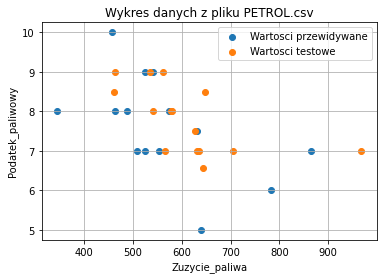

Średni błąd bezwzględny: 4876.24687879676
Błąd średniokwadratowy: 24640141.778522328
Pierwiastek błędu średniokwadratowego: 4963.8837394244365
Współczynnik funckji liniowej (coef_): 8.001171989452098
Miejce przecięcia z osią y (intercept_): 8.138001757984163


In [309]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(x,y_1,test_size= 0.3,train_size=0.3)

coef = linia_regresji.coef_
intercept = linia_regresji.intercept_
y_pred = linia_regresji.predict(X_test)

meansquere_error = metrics.mean_squared_error(y_pred, y_test)
meanabsolute_error = metrics.mean_absolute_error(y_pred, y_test)

plt.scatter(X_test, y_pred, label = 'dane przewidywane')
plt.scatter(X_test,y_test,label = 'dane testowe')
plt.plot(X_test,y_pred,label = 'linia regresji')

plt.title("Wyniki regresji liniowej")
plt.xlabel("Zuzycie_paliwa")
plt.ylabel("Podatek_paliwowy")
plt.legend()
plt.grid()
plt.show()

plt.scatter(X_train,y_train, label = 'Wartosci przewidywane')
plt.scatter(X_test,y_test, label = 'Wartosci testowe')

plt.title("Wykres danych z pliku PETROL.csv")
plt.xlabel('Zuzycie_paliwa')
plt.ylabel('Podatek_paliwowy')
plt.legend()
plt.grid()
plt.show()


print("Średni błąd bezwzględny:", meanabsolute_error)
print("Błąd średniokwadratowy:", meansquere_error)
print("Pierwiastek błędu średniokwadratowego:", np.sqrt(meansquere_error))

coef = linia_regresji.coef_
intercept = linia_regresji.intercept_

print("Współczynnik funckji liniowej (coef_):", coef[0][0])
print("Miejce przecięcia z osią y (intercept_):", intercept[0])

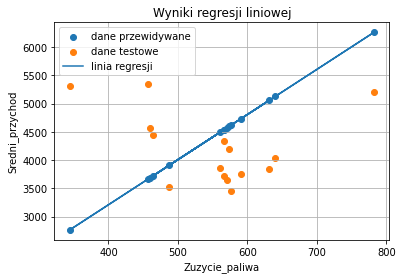

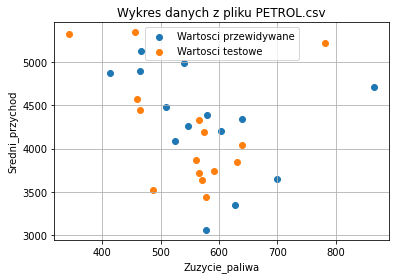

Średni błąd bezwzględny: 982.641078230297
Błąd średniokwadratowy: 1271954.2040044244
Pierwiastek błędu średniokwadratowego: 1127.8094714996964
Współczynnik funckji liniowej (coef_): 8.001171989452098
Miejce przecięcia z osią y (intercept_): 8.138001757984163


In [310]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(x,y_2,test_size= 0.3,train_size=0.3)

coef = linia_regresji.coef_
intercept = linia_regresji.intercept_
y_pred = linia_regresji.predict(X_test)

meansquere_error = metrics.mean_squared_error(y_pred, y_test)
meanabsolute_error = metrics.mean_absolute_error(y_pred, y_test)

plt.scatter(X_test, y_pred, label = 'dane przewidywane')
plt.scatter(X_test,y_test,label = 'dane testowe')
plt.plot(X_test,y_pred,label = 'linia regresji')

plt.title("Wyniki regresji liniowej")
plt.xlabel("Zuzycie_paliwa")
plt.ylabel("Sredni_przychod")
plt.legend()
plt.grid()
plt.show()

plt.scatter(X_train,y_train, label = 'Wartosci przewidywane')
plt.scatter(X_test,y_test, label = 'Wartosci testowe')

plt.title("Wykres danych z pliku PETROL.csv")
plt.xlabel('Zuzycie_paliwa')
plt.ylabel('Sredni_przychod')
plt.legend()
plt.grid()
plt.show()


print("Średni błąd bezwzględny:", meanabsolute_error)
print("Błąd średniokwadratowy:", meansquere_error)
print("Pierwiastek błędu średniokwadratowego:", np.sqrt(meansquere_error))

coef = linia_regresji.coef_
intercept = linia_regresji.intercept_

print("Współczynnik funckji liniowej (coef_):", coef[0][0])
print("Miejce przecięcia z osią y (intercept_):", intercept[0])

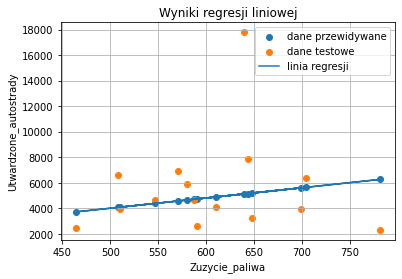

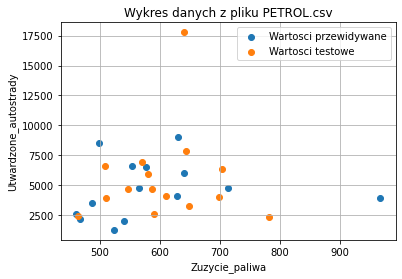

Średni błąd bezwzględny: 2294.0636585604066
Błąd średniokwadratowy: 14004892.435558045
Pierwiastek błędu średniokwadratowego: 3742.311108868161
Współczynnik funckji liniowej (coef_): 8.001171989452098
Miejce przecięcia z osią y (intercept_): 8.138001757984163


In [311]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(x,y_3,test_size= 0.3,train_size=0.3)

coef = linia_regresji.coef_
intercept = linia_regresji.intercept_
y_pred = linia_regresji.predict(X_test)

meansquere_error = metrics.mean_squared_error(y_pred, y_test)
meanabsolute_error = metrics.mean_absolute_error(y_pred, y_test)

plt.scatter(X_test, y_pred, label = 'dane przewidywane')
plt.scatter(X_test,y_test,label = 'dane testowe')
plt.plot(X_test,y_pred,label = 'linia regresji')

plt.title("Wyniki regresji liniowej")
plt.xlabel("Zuzycie_paliwa")
plt.ylabel("Utwardzone_autostrady")
plt.legend()
plt.grid()
plt.show()

plt.scatter(X_train,y_train, label = 'Wartosci przewidywane')
plt.scatter(X_test,y_test, label = 'Wartosci testowe')

plt.title("Wykres danych z pliku PETROL.csv")
plt.xlabel('Zuzycie_paliwa')
plt.ylabel('Utwardzone_autostrady')
plt.legend()
plt.grid()
plt.show()


print("Średni błąd bezwzględny:", meanabsolute_error)
print("Błąd średniokwadratowy:", meansquere_error)
print("Pierwiastek błędu średniokwadratowego:", np.sqrt(meansquere_error))

coef = linia_regresji.coef_
intercept = linia_regresji.intercept_

print("Współczynnik funckji liniowej (coef_):", coef[0][0])
print("Miejce przecięcia z osią y (intercept_):", intercept[0])

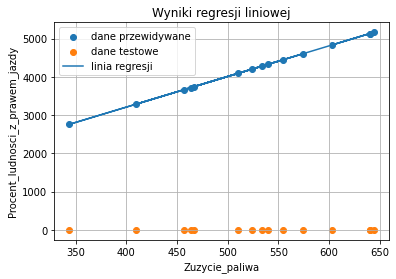

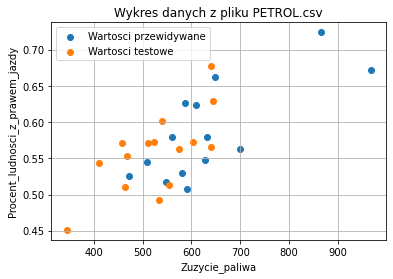

Średni błąd bezwzględny: 4224.196440199241
Błąd średniokwadratowy: 18305165.20367881
Pierwiastek błędu średniokwadratowego: 4278.453599570622
Współczynnik funckji liniowej (coef_): 8.001171989452098
Miejce przecięcia z osią y (intercept_): 8.138001757984163


In [312]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(x,y_4,test_size= 0.3,train_size=0.3)

coef = linia_regresji.coef_
intercept = linia_regresji.intercept_
y_pred = linia_regresji.predict(X_test)

meansquere_error = metrics.mean_squared_error(y_pred, y_test)
meanabsolute_error = metrics.mean_absolute_error(y_pred, y_test)

plt.scatter(X_test, y_pred, label = 'dane przewidywane')
plt.scatter(X_test,y_test,label = 'dane testowe')
plt.plot(X_test,y_pred,label = 'linia regresji')

plt.title("Wyniki regresji liniowej")
plt.xlabel("Zuzycie_paliwa")
plt.ylabel("Procent_ludnosci_z_prawem_jazdy")
plt.legend()
plt.grid()
plt.show()

plt.scatter(X_train,y_train, label = 'Wartosci przewidywane')
plt.scatter(X_test,y_test, label = 'Wartosci testowe')

plt.title("Wykres danych z pliku PETROL.csv")
plt.xlabel('Zuzycie_paliwa')
plt.ylabel('Procent_ludnosci_z_prawem_jazdy')
plt.legend()
plt.grid()
plt.show()


print("Średni błąd bezwzględny:", meanabsolute_error)
print("Błąd średniokwadratowy:", meansquere_error)
print("Pierwiastek błędu średniokwadratowego:", np.sqrt(meansquere_error))

coef = linia_regresji.coef_
intercept = linia_regresji.intercept_

print("Współczynnik funckji liniowej (coef_):", coef[0][0])
print("Miejce przecięcia z osią y (intercept_):", intercept[0])

### Regresja logistyczna

Naturalnym rozwojem modeli linowych, są uogólnione modele liniowe (*generalized linear models*). 

Ich przewodnią ideą jest to, że zamiast reprezentować zmienną zależną jako kombinację liniową niezależnych, staramy się stworzyć model liniowy pewnej funkcji zmiennej zależnej.

$$ f(y) =  \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

wymaga się, aby funkcja ta była odwracalna, dzięki czemu 

$$ y = f^{-1} ( \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n)$$

Takie przekształcenie stosujemy wtedy, gdy zbiór wartości zmiennej zależnej nie jest całym zbiorem liczb rzeczywistych tylko jest w jakiś sposób ograniczony. Na przykład do przedziału $[0,1]$, do wartości dodatnich lub wartości całkowitych. W tens posób można wybrać funkcję $f$, której dziedziną jest zbiór wartości $y$ zaś obrazem jest zbiór liczb rzeczywistych.

Jedną z takich funkcji jest tzw. funkcja logistyczna, która odpowiada zbiorowi $[0,1]$ przez co często jest wykorzystywana do analizy prawdopodobieństwa przynależności do danej klasy, lub też inaczej jako klasyfikator.

W takiej sytuacji zmienne zależne powinny przyjmować wyłącznie wartości $0$ i $1$ co odpowiada temu czy dany punkt należy do interesującej klasy. Model logistyczny poznwala na określenie estymaty prawdopodobieństwa, czy punkt należy czy nie do danej klasy. 

Do tworzenia modeli logistycznyc służy klasa: ```LogisticRegression```

### Zadanie 3

Na podstawie danych zawartych w pliku HEART.csv wykonaj i oceń regresję logistyczną, gdzie Twoją daną zależną jest kolumna "num". Wykonanie zadania powinno składać się z następujących kroków:

1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytanie danych z pliku HEART.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Przetworzenie danych, tj: oznaczenie braku danych ("?") na NaN, usunięcię kolumn zawierających zbyt dużo brakujących danych (3 kolumny), usunięcie wierszy z brakującymi wartościami.
4. Zakoduj niezależne zmienne kategorialne np: jako wartości "dummy", za pomoca metody get_dummies(). Zmienne kategorialne to takie, które reprezentuja przynależność do kategorii. W przypadku naszych odfiltrowanych danych będą to kolumny: cp, restecg, fbs, sex, exang. Jako, że trzy ostatnie już zapisane są w formie 0 i 1 tylko cp i restecg wymagają tej operacji.
5. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zależnych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (20%).
6. Utwróz model regresji logistycznej.
7. Oceń wynik za pomocą dostępnych metryk (np: metody związane z modelem czy classification_report() z sklearn)

Możesz również spróbować ustandaryzować dane (np: poprzez skalowanie) po podziale na zbiory treningowy i testowy.

In [313]:
from sklearn.metrics import classification_report

In [314]:
df_heart = pd.read_csv('HEART.csv')

head = df_heart.head()
desribe = df_heart.describe()
shape = np.shape(df_heart)
print(head)
print(desribe)
print(shape)

   age  sex  cp trestbps chol fbs restecg thalach exang  oldpeak slope ca  \
0   28    1   2      130  132   0       2     185     0      0.0     ?  ?   
1   29    1   2      120  243   0       0     160     0      0.0     ?  ?   
2   29    1   2      140    ?   0       0     170     0      0.0     ?  ?   
3   30    0   1      170  237   0       1     170     0      0.0     ?  ?   
4   31    0   2      100  219   0       1     150     0      0.0     ?  ?   

  thal  num         
0    ?           0  
1    ?           0  
2    ?           0  
3    6           0  
4    ?           0  
              age         sex          cp     oldpeak  num       
count  294.000000  294.000000  294.000000  294.000000  294.000000
mean    47.826531    0.724490    2.982993    0.586054    0.360544
std      7.811812    0.447533    0.965117    0.908648    0.480977
min     28.000000    0.000000    1.000000    0.000000    0.000000
25%     42.000000    0.000000    2.000000    0.000000    0.000000
50%     49.0000

In [315]:
df_heart = df_heart.replace("?",np.nan)
print(df_heart)

     age  sex  cp trestbps chol fbs restecg thalach exang  oldpeak slope   ca  \
0     28    1   2      130  132   0       2     185     0      0.0   NaN  NaN   
1     29    1   2      120  243   0       0     160     0      0.0   NaN  NaN   
2     29    1   2      140  NaN   0       0     170     0      0.0   NaN  NaN   
3     30    0   1      170  237   0       1     170     0      0.0   NaN  NaN   
4     31    0   2      100  219   0       1     150     0      0.0   NaN  NaN   
..   ...  ...  ..      ...  ...  ..     ...     ...   ...      ...   ...  ...   
289   52    1   4      160  331   0       0      94     1      2.5   NaN  NaN   
290   54    0   3      130  294   0       1     100     1      0.0     2  NaN   
291   56    1   4      155  342   1       0     150     1      3.0     2  NaN   
292   58    0   2      180  393   0       0     110     1      1.0     2  NaN   
293   65    1   4      130  275   0       1     115     1      1.0     2  NaN   

    thal  num         
0   

In [316]:
df_heart = df_heart.drop(columns=['slope', 'ca', 'thal'])
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
2,29,1,2,140,NaN,0,0,170,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0


In [317]:
df_heart = df_heart.dropna()
df_heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0
5,32,0,2,105,198,0,0,165,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,1
290,54,0,3,130,294,0,1,100,1,0.0,1
291,56,1,4,155,342,1,0,150,1,3.0,1
292,58,0,2,180,393,0,0,110,1,1.0,1


In [318]:
df_heart = pd.get_dummies(df_heart,columns = ["cp","restecg"])
df_heart.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,num,cp_1,cp_2,cp_3,cp_4,restecg_0,restecg_1,restecg_2
0,28,1,130,132,0,185,0,0.0,0,0,1,0,0,0,0,1
1,29,1,120,243,0,160,0,0.0,0,0,1,0,0,1,0,0
3,30,0,170,237,0,170,0,0.0,0,1,0,0,0,0,1,0
4,31,0,100,219,0,150,0,0.0,0,0,1,0,0,0,1,0
5,32,0,105,198,0,165,0,0.0,0,0,1,0,0,1,0,0


In [319]:
kolumny = np.array(df_heart[["age","sex","trestbps","chol","fbs","thalach","exang","oldpeak","cp_1","cp_2","cp_3","cp_4","restecg_0","restecg_1","restecg_2"]])
print(df_heart)

     age  sex trestbps chol fbs thalach exang  oldpeak  num         cp_1  \
0     28    1      130  132   0     185     0      0.0           0     0   
1     29    1      120  243   0     160     0      0.0           0     0   
3     30    0      170  237   0     170     0      0.0           0     1   
4     31    0      100  219   0     150     0      0.0           0     0   
5     32    0      105  198   0     165     0      0.0           0     0   
..   ...  ...      ...  ...  ..     ...   ...      ...         ...   ...   
289   52    1      160  331   0      94     1      2.5           1     0   
290   54    0      130  294   0     100     1      0.0           1     0   
291   56    1      155  342   1     150     1      3.0           1     0   
292   58    0      180  393   0     110     1      1.0           1     0   
293   65    1      130  275   0     115     1      1.0           1     0   

     cp_2  cp_3  cp_4  restecg_0  restecg_1  restecg_2  
0       1     0     0         

In [320]:
X_train, X_test, y_train, y_test = train_test_split(kolumny, np.array(df_heart["num       "]).reshape(-1, 1), test_size=0.20)

linia_regresji = lin.LogisticRegression().fit(X_train, y_train.ravel())
linia_regresji

c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [321]:
y_pred = linia_regresji.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        32
           1       0.80      0.76      0.78        21

    accuracy                           0.83        53
   macro avg       0.82      0.82      0.82        53
weighted avg       0.83      0.83      0.83        53

